In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
number_of_samples = 200
outlier_perc = 0.1
number_of_outliers = number_of_samples - int ( (1-outlier_perc) * number_of_samples )


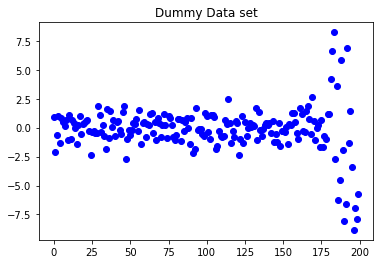

In [3]:
# Normal Data
normal_data = np.random.randn(int ( (1-outlier_perc) * number_of_samples ),1)
# Inject Outlier data
outliers = np.random.uniform(low=-9,high=9,size=(number_of_outliers,1))
# Final data set
final_data = np.r_[normal_data,outliers]

#Check data
plt.cla()
plt.figure(1)
plt.title("Dummy Data set")
plt.scatter(range(len(final_data)),final_data,c='b')

{'boxes': [<matplotlib.lines.Line2D at 0x10d22cf98>],
 'caps': [<matplotlib.lines.Line2D at 0x10d244710>,
 'fliers': [<matplotlib.lines.Line2D at 0x10d24bf98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10d24b128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10d23a710>,
  <matplotlib.lines.Line2D at 0x10d23aeb8>]}

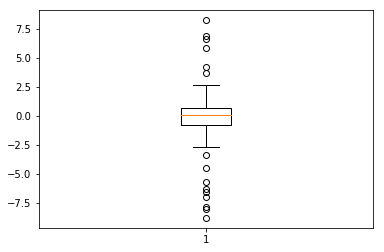

In [4]:
## Detect Outlier###
plt.boxplot(final_data)

In [5]:
## IQR Method Outlier Detection and Removal(filter) ##
quartile75, quartile25 = np.percentile(final_data, [75 ,25])
## Inter Quartile Range ##
IQR = quartile75 - quartile25
print("IQR",IQR)

IQR 1.4941959696670106


In [6]:
## Calculate Min and Max values ##
min_value = quartile25 - (IQR*1.5)
max_value = quartile75 + (IQR*1.5)
print("Max", max_value)
print("Min", min_value)

Max 2.942189924241621
Min -3.034593954426421


In [7]:
filtered_values = final_data.copy()
filtered_values[ filtered_values< min_value] = np.nan
filtered_values[ filtered_values > max_value] = np.nan

/Users/sibanjan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


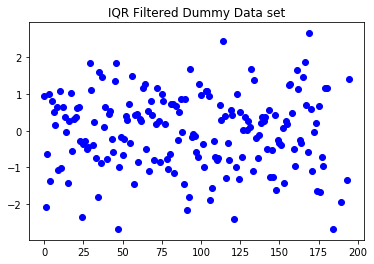

In [8]:
#Check filtered data
plt.cla()
plt.figure(1)
plt.title("IQR Filtered Dummy Data set")
plt.scatter(range(len(filtered_values)),filtered_values,c='b')

In [9]:
##### Winsorization ####

from scipy.stats.mstats import winsorize
import statsmodels.api as sm

/Users/sibanjan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
limit = 0.15
winsorized_data = winsorize(final_data,limits=limit)

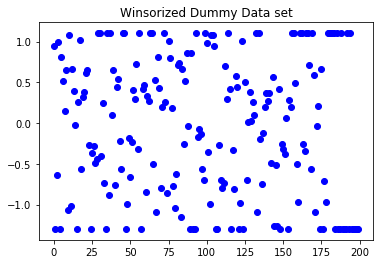

In [11]:
#Check winsorized data
plt.cla()
plt.figure(1)
plt.title("Winsorized Dummy Data set")
plt.scatter(range(len(winsorized_data)),winsorized_data,c='b')

In [12]:
### Trimming Outliers ###
from scipy import stats

In [13]:
trimmed_data = stats.trimboth(final_data, 0.1)

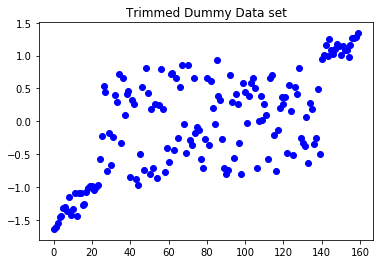

In [14]:
#Check trimmed data
plt.cla()
plt.figure(1)
plt.title("Trimmed Dummy Data set")
plt.scatter(range(len(trimmed_data)),trimmed_data,c='b')